In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torchvision import transforms


In [3]:
train_path = r"C:\Users\91787\Desktop\skin\train"
valid_path = r"C:\Users\91787\Desktop\skin\val"


In [5]:
train_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

valid_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])


In [7]:
train_data = datasets.ImageFolder(train_path, transform=train_transform)
valid_data = datasets.ImageFolder(valid_path, transform=valid_transform)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=16, shuffle=False)

print(train_data.class_to_idx)


{'class0_normal': 0, 'class1_acne': 1, 'class2_wrinkles': 2, 'class3_Eczema': 3, 'class4_Rosacea': 4, 'class5_dark_spots': 5}


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torchvision.models import ResNet18_Weights
model = models.resnet18(weights=ResNet18_Weights.DEFAULT)



In [11]:
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
for param in model.parameters():
    param.requires_grad = False
for param in model.layer4.parameters():
    param.requires_grad = True
model.fc = nn.Linear(model.fc.in_features, 6)
for param in model.fc.parameters():
    param.requires_grad = True
model = model.to(device)

print("Model loaded and configured successfully")

Model loaded and configured successfully


In [13]:
optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=0.0003
)
criterion = nn.CrossEntropyLoss()


In [15]:
epochs = 6
train_loss = []   

for epoch in range(epochs):
    model.train()
    running_loss = 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_loss.append(avg_loss)

    print(f"Epoch {epoch+1}/{epochs} - Avg Loss: {avg_loss:.4f}")


Epoch 1/6 - Avg Loss: 0.5860
Epoch 2/6 - Avg Loss: 0.3347
Epoch 3/6 - Avg Loss: 0.2581
Epoch 4/6 - Avg Loss: 0.2057
Epoch 5/6 - Avg Loss: 0.1783
Epoch 6/6 - Avg Loss: 0.1525


In [17]:
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for imgs, labels in valid_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs,1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

accuracy = 100 * correct / total
print("Validation Accuracy:", accuracy, "%")


Validation Accuracy: 80.08474576271186 %


In [19]:
torch.save(model.state_dict(), "face_concern_model.pth")
print("Model saved successfully")


Model saved successfully


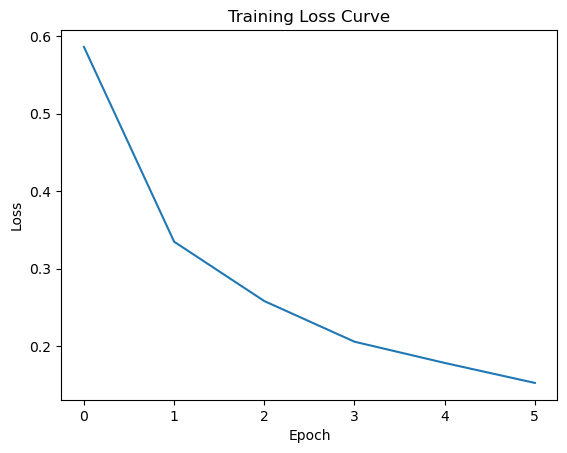

In [21]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


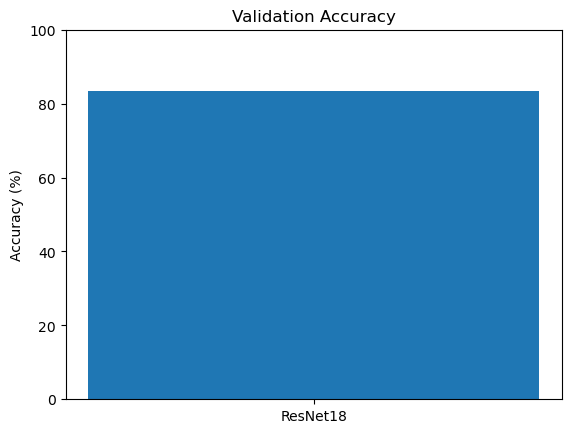

In [23]:
accuracy = [83.36]   

import matplotlib.pyplot as plt
plt.bar(["ResNet18"], accuracy)
plt.ylabel("Accuracy (%)")
plt.title("Validation Accuracy")
plt.ylim(0,100)
plt.show()


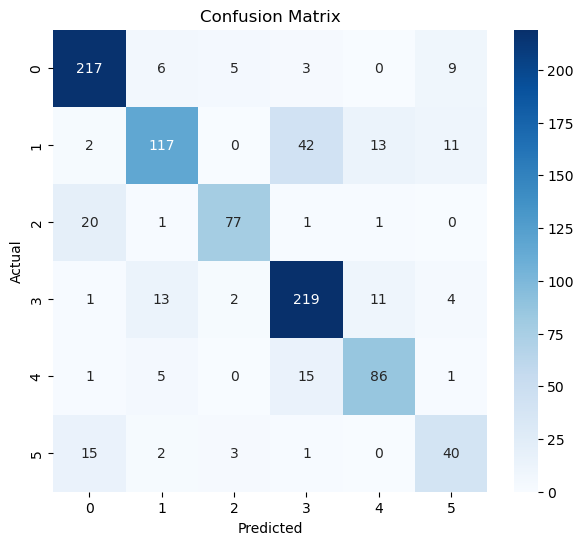

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for imgs, labels in valid_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        preds = outputs.argmax(1).cpu()
        all_preds.extend(preds)
        all_labels.extend(labels)

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [35]:
import os

folder = r"C:\Users\91787\Desktop\skin\val\class1_acne"
print(os.listdir(folder))


['157__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg', '161__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg', '171__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg', '183__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDE4XQ.jpeg', '196__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg', 'acne-closed-comedo-28.jpeg', 'acne-cystic-1.jpeg', 'acne-cystic-101.jpeg', 'acne-cystic-104.jpeg', 'acne-cystic-11.jpeg', 'acne-cystic-122.jpeg', 'acne-cystic-133.jpeg', 'acne-cystic-36.jpeg', 'acne-cystic-50.jpeg', 'acne-cystic-56.jpeg', 'acne-cystic-84 copy.jpeg', 'acne-cystic-84.jpeg', 'acne-cystic-9.jpeg', 'acne-cystic-96.jpeg', 'acne-excoriated-13.jpeg', 'acne-excoriated-17.jpeg', 'acne-excoriated-18.jpeg', 'acne-excoriated-2.jpeg', 'acne-face-1-19__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg', 'acne-face-1-20__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg', 'acne-face-1-53__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.

In [37]:
from PIL import Image
import torch

img_path = r"C:\Users\91787\Desktop\skin\val\class1_acne\acne-cystic-1.jpeg"

img = Image.open(img_path).convert("RGB")

img = valid_transform(img).unsqueeze(0).to(device)

classes = ['class0_normal','class1_acne','class2_wrinkles',
           'class3_Eczema','class4_Rosacea','class5_dark_spots']

with torch.no_grad():
    output = model(img)
    pred = output.argmax(1).item()

print("Predicted Class:", classes[pred])


Predicted Class: class3_Eczema


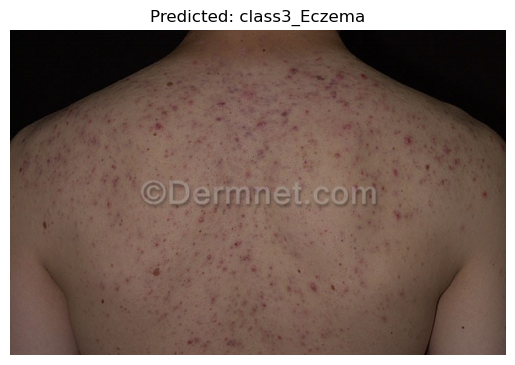

In [39]:
import matplotlib.pyplot as plt
from PIL import Image

plt.imshow(Image.open(img_path))
plt.axis("off")
plt.title(f"Predicted: {classes[pred]}")
plt.show()
